### Installation

`conda install brockman-pipeline`

`conda install ruby amused bedtools ucsc-twobittofa samtools trimmomatic r-jackstraw r-ggplot2 r-tsne -y`

`install.packages("devtools")`  
`library(devtools)`  
`install_github("Carldeboer/BrockmanR")`

### Import packages

In [1]:
library(BrockmanR)
library(irlba)

Loading required package: ggplot2
Loading required package: tsne
Loading required package: Matrix


### Preprocess

In [2]:
chrom_size = read.table('../../input/mm9/mm9.chrom.sizes')
head(chrom_size)
chrom_size$V3 <- rep(0,dim(chrom_size)[1])
head(chrom_size)
chromBED <- chrom_size[, c("V1", "V3", "V2")]
head(chromBED)

V1   V2       
1 chr1 197195432
2 chr2 181748087
3 chr3 159599783
4 chr4 155630120
5 chr5 152537259
6 chr6 149517037

V1   V2        V3
1 chr1 197195432 0 
2 chr2 181748087 0 
3 chr3 159599783 0 
4 chr4 155630120 0 
5 chr5 152537259 0 
6 chr6 149517037 0

V1   V3 V2       
1 chr1 0  197195432
2 chr2 0  181748087
3 chr3 0  159599783
4 chr4 0  155630120
5 chr5 0  152537259
6 chr6 0  149517037

In [3]:
# write.table(file = 'chroms.bed', chromBED,col.names = FALSE,row.names = FALSE,quote = FALSE,sep="\t")

In [4]:
bamfile <- list.files(path = "../../input/sc-bams_nodup/",pattern = "\\.bam$")
length(bamfile)

[1] 12178

In [5]:
path_to_bamfile <- paste0("../../../../input/sc-bams_nodup/",bamfile)
cellnames <- sapply(strsplit(bamfile,'.',fixed = TRUE), "[[", 2)
sample_list_bam <- cbind(cellnames,path_to_bamfile)
head(sample_list_bam)
# write.table(file = './Brockman-master/Example/sample_list_bam.txt', sample_list_bam,col.names = FALSE,row.names = FALSE,quote = FALSE,sep="\t")

cellnames                           
[1,] AGCGATAGAATACGATAATGGCAGCTCGCAGGACGT
[2,] AGCGATAGAATATTACTTTCCGCGGACTGTACTGAC
[3,] AGCGATAGACCAGGCGCATGGCAGCTCGATAGAGGC
[4,] AGCGATAGAGATTACGTTGCGCAATGACGTACTGAC
[5,] AGCGATAGAGGTCAGCTTGGAGTTGCGTGTACTGAC
[6,] AGCGATAGAGTTGAATCAAAGCTAGGTTCCTATCCT
     path_to_bamfile                                                                                 
[1,] ../../../../input/sc-bams_nodup/BoneMarrow_62016.AGCGATAGAATACGATAATGGCAGCTCGCAGGACGT.header.bam
[2,] ../../../../input/sc-bams_nodup/BoneMarrow_62016.AGCGATAGAATATTACTTTCCGCGGACTGTACTGAC.header.bam
[3,] ../../../../input/sc-bams_nodup/BoneMarrow_62016.AGCGATAGACCAGGCGCATGGCAGCTCGATAGAGGC.header.bam
[4,] ../../../../input/sc-bams_nodup/BoneMarrow_62016.AGCGATAGAGATTACGTTGCGCAATGACGTACTGAC.header.bam
[5,] ../../../../input/sc-bams_nodup/BoneMarrow_62016.AGCGATAGAGGTCAGCTTGGAGTTGCGTGTACTGAC.header.bam
[6,] ../../../../input/sc-bams_nodup/BoneMarrow_62016.AGCGATAGAGTTGAATCAAAGCTAGGTTCCTATCCT.header.bam

In [6]:
elbow_plot <- function(mat,num_pcs=50,scale=FALSE,center=FALSE,title='',width=3,height=3){
    set.seed(2019) 
    mat = data.matrix(mat)
    SVD = irlba(mat, num_pcs, num_pcs,scale=scale,center=center)
    options(repr.plot.width=width, repr.plot.height=height)
    df_plot = data.frame(PC=1:num_pcs, SD=SVD$d);
#     print(SVD$d[1:num_pcs])
    p <- ggplot(df_plot, aes(x = PC, y = SD)) +
      geom_point(col="#cd5c5c",size = 1) + 
      ggtitle(title)
    return(p)
}

### Obtain Feature Matrix

`bsub < example_run_pipeine_LSF.sh`

In [7]:
start_time <- Sys.time()

In [8]:
metadata <- read.table('../../input/metadata.tsv',
                         header = TRUE,
                         stringsAsFactors=FALSE,quote="",row.names=1)

In [9]:
sampleDesc <- metadata

In [10]:
allData = BrockmanR::inputKMerFreqs(
    fileNames = sprintf("./Brockman-master/Example/kmer_frequencies/%s.freq.gz",
                        rownames(metadata)), 
    IDs = rownames(metadata))

Inputting i=1/12178
Inputting i=51/12178
Inputting i=101/12178
Inputting i=151/12178
Inputting i=201/12178
Inputting i=251/12178
Inputting i=301/12178
Inputting i=351/12178
Inputting i=401/12178
Inputting i=451/12178
Inputting i=501/12178
Inputting i=551/12178
Inputting i=601/12178
Inputting i=651/12178
Inputting i=701/12178
Inputting i=751/12178
Inputting i=801/12178
Inputting i=851/12178
Inputting i=901/12178
Inputting i=951/12178
Inputting i=1001/12178
Inputting i=1051/12178
Inputting i=1101/12178
Inputting i=1151/12178
Inputting i=1201/12178
Inputting i=1251/12178
Inputting i=1301/12178
Inputting i=1351/12178
Inputting i=1401/12178
Inputting i=1451/12178
Inputting i=1501/12178
Inputting i=1551/12178
Inputting i=1601/12178
Inputting i=1651/12178
Inputting i=1701/12178
Inputting i=1751/12178
Inputting i=1801/12178
Inputting i=1851/12178
Inputting i=1901/12178
Inputting i=1951/12178
Inputting i=2001/12178
Inputting i=2051/12178
Inputting i=2101/12178
Inputting i=2151/12178
Inputting i

In [11]:
allData[1:5,1:5]

TCCGCGAACTAACTAGGTTGCTACGGTCATAGAGGC
TTTTAAAA 0.0116696442                        
TTTGCAAA 0.0044008404                        
TTTGAAAA 0.0060326127                        
TTTCGAAA 0.0002472382                        
TTTCCAAA 0.0044255642                        
         TCCGCGAAAGGTCAGCTTTGCGGATAGTGTACTGAC
TTTTAAAA 0.0163818000                        
TTTGCAAA 0.0046254494                        
TTTGAAAA 0.0063359021                        
TTTCGAAA 0.0001927271                        
TTTCCAAA 0.0044327224                        
         ATTACTCGTTGCCGTAGGCTTAATCTTGTATAGCCT
TTTTAAAA 0.0116088289                        
TTTGCAAA 0.0034826487                        
TTTGAAAA 0.0056109340                        
TTTCGAAA 0.0006449349                        
TTTCCAAA 0.0040630901                        
         TCCGCGAAACCAGGCGCAAAGCTAGGTTGTACTGAC
TTTTAAAA 0.0141069454                        
TTTGCAAA 0.0046684855                        
TTTGAAAA 0.0056326293                        
TTTCGAAA 0.0003044664                        
TTTCCAAA 0.0040976109                        
         ATTCAGAATCGTAGCATCGCGCAATGACCCTATCCT
TTTTAAAA 0.0129692197                        
TTTGCAAA 0.0026603528                        
TTTGAAAA 0.0046556173                        
TTTCGAAA 0.0003325441                        
TTTCCAAA 0.0035748490

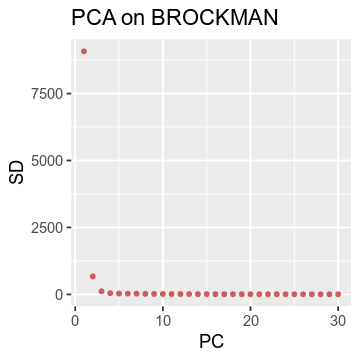

In [12]:
p_elbow_BROCKMAN <- elbow_plot(allData,num_pcs = 30, title = 'PCA on BROCKMAN')
p_elbow_BROCKMAN

In [ ]:
pcs = doKMerPCA(allData, nPCs = 10);
head(pcs)

Scaling data
Doing PCA


In [ ]:
pcs$nPCs

In [ ]:
end_time <- Sys.time()

In [25]:
end_time - start_time

Time difference of 7.174332 hours

In [ ]:
df_out = t(pcs$x)[1:pcs$nPCs,]
dim(df_out)
df_out[1:5,1:5]

In [26]:
all(colnames(df_out) == rownames(metadata))

[1] TRUE

In [ ]:
saveRDS(df_out, file = '../../output/feature_matrices/FM_BROCKMAN_cusanovich2018subset.rds')

### Downstream Analysis

In [ ]:
# combine our sample description table with the tSNE projection
pcs$tSNEProj = merge(pcs$tSNEProj,metadata, by.x="ID",by.y="row.names")
#pcs$tSNEProj$treated = !grepl("-rep",pcs$tSNEProj$celltype)

In [27]:
dim(pcs$tSNEProj)
head(pcs$tSNEProj)

[1] 12178     4

ID                                   tSNE1     tSNE2     label 
1 AGCGATAGAACGAATTCGAAGCCTACGACCTATCCT  87.78452 -47.96175 Lung  
2 AGCGATAGAACGAATTCGAAGCCTACGATATAGCCT  71.48026  27.36386 Lung  
3 AGCGATAGAACGAATTCGACTGAGCGACTATAGCCT -84.67282 -45.55337 Lung  
4 AGCGATAGAACGAATTCGCAATGAGTCCCAGGACGT -68.08292  17.79370 Thymus
5 AGCGATAGAACGAATTCGCCTCCGACGGGTACTGAC  73.41360  14.74591 Lung  
6 AGCGATAGAACGAATTCGGCGATTGCAGCCTATCCT  27.77479  27.37983 Heart

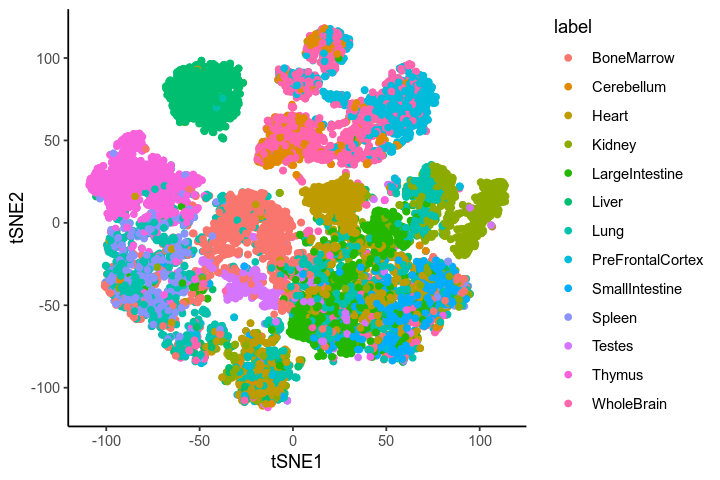

In [28]:
options(repr.plot.width=6, repr.plot.height=4)
p=ggplot(pcs$tSNEProj, aes(x=tSNE1, y=tSNE2, colour=label)) + theme_classic() + geom_point(); 
print(p)

In [29]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS: /data/pinello/SHARED_SOFTWARE/anaconda3/envs/ATACseq_BROCKMAN3/lib/R/lib/libRblas.so
LAPACK: /data/pinello/SHARED_SOFTWARE/anaconda3/envs/ATACseq_BROCKMAN3/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] irlba_2.3.2          Matrix_1.2-17        BrockmanR_0.0.0.9000
[4] tsne_0.1-3           ggplot2_3.2.0       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       pillar_1

In [ ]:
save.image(file = 'BROCKMAN_cusanovich2018subset.RData')